# Decision Tree Classification

#### intuition

알고리즘 특징: 스무고개. 질문을 던져서 대상을 좁혀나가는 탐색방법  
질문기준: threshold를 기준으로 노드를 분리했을 때 정보획득량이 가장 큰 질문  
정보획득량: 나누기 전 노드의 엔트로피 - 나눈 노드들의 엔트로피 합  
엔트로피: 불확실성의 정도  
불확실성: A가 100개 있는 집단 vs. A가 90개 B가 10개 있는 집단. 어느 집단이 더 불확실한 결과를 가지고 있는가?

#### 장단점
장점
- 이상치에 영향을 덜받는다.
- null데이터가 있을 때 처리하지 않아도 알고리즘이 동작한다.
단점
- overfitting
  - max_depth, min_samples_split 설정

reference. https://datascienceschool.net/03%20machine%20learning/12.01%20%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Example
Purchased vs. Age, EstimatedSalary

### Step1: Load Dataset

In [2]:
# 'Social_Network_Ads.csv' 파일 읽기 pd.read_csv()
# df shape 확인 

df = pd.read_csv('Social_Network_Ads.csv')
df.shape

(400, 3)

In [3]:
# df head 행 보기

df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
# df descriptive statistics

df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


### Step2: Visualize Dataset

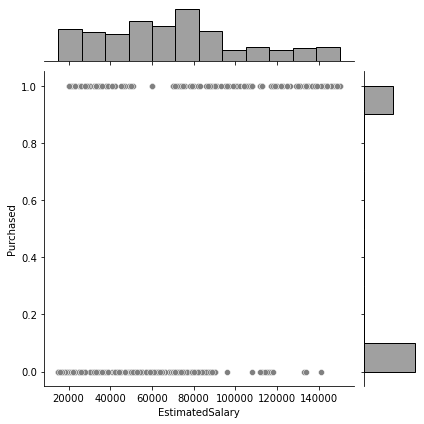

In [5]:
# sns.jointplot 활용한 시각화. x='EstimatedSalary', y='Purchased'

sns.jointplot(x='EstimatedSalary', y='Purchased', data = df, color = 'gray')

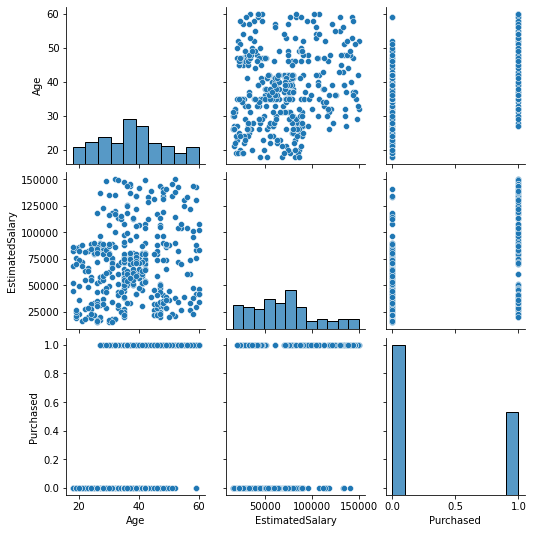

In [6]:
# sns.pairplot()

sns.pairplot(df)

### Step3: Define Train set and Test Set

In [7]:
# X에 -1번째 column까지 할당
# y에 -1번째 column을 할당


X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [8]:
# split train set and test set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test 할당. test_size=0.2, random_state=0


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Step4: Train Model

In [9]:
# from sklearn.tree import DecisionTreeClassifier
# classifier에 DecisionTreeClassifier 할당. criterion = 'entropy', max_depth=3


from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [10]:
# minimize ccp (Cost-Complexity Pruning 비용복잡도 가지치기)
# reference. https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
# ccp_alpha: 값이 클수록 모형이 단순해지고(과적합 방지)) 모형 정확도는 감소
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

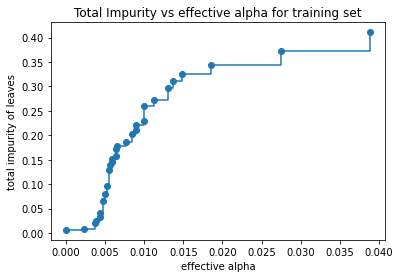

In [11]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [12]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2729237764396893


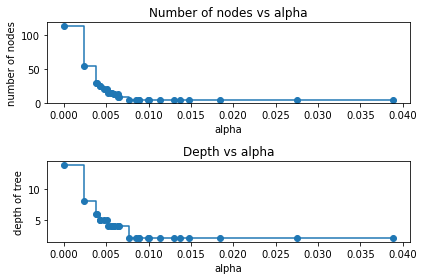

In [13]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

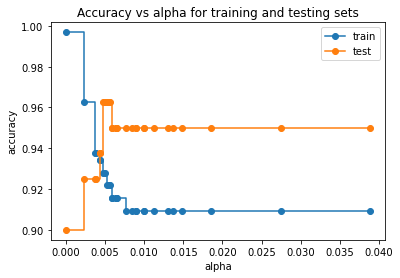

In [14]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [15]:
# from sklearn.tree import DecisionTreeClassifier
# classifier에 DecisionTreeClassifier 할당. 
# criterion = 'entropy', random_state = 0, ccp_alpha=0.005, max_depth=3


from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, ccp_alpha=0.005, max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.005, criterion='entropy', max_depth=3,
                       random_state=0)

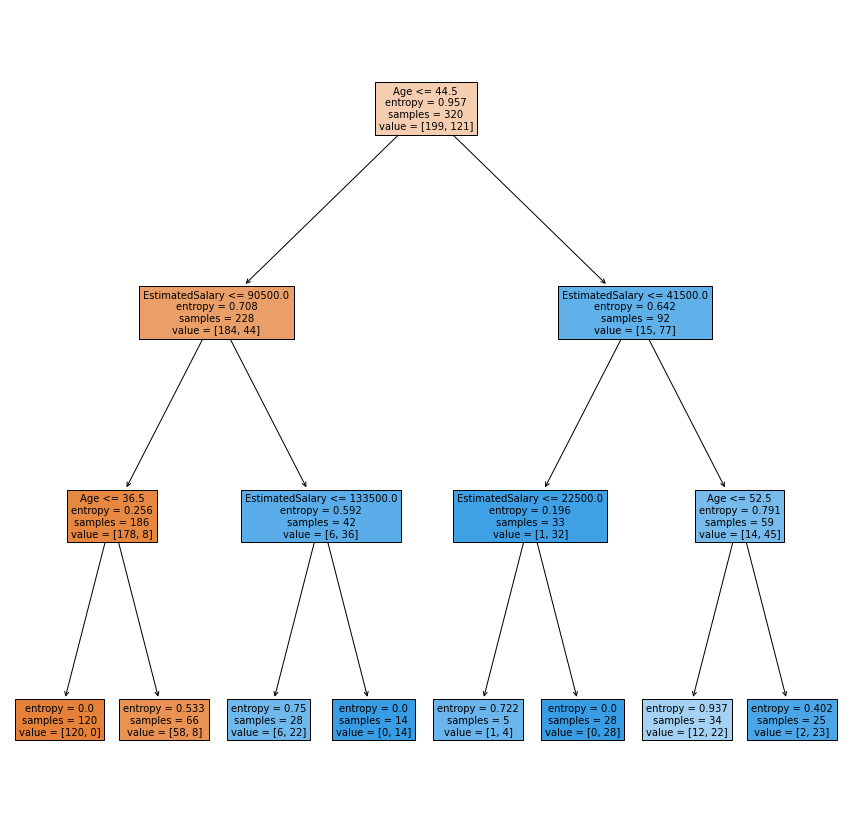

In [16]:
# from sklearn.tree import plot_tree
# use plot_tree. param: feature_name=X_train.columns, filled=True, fontsize


from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
plot_tree(classifier, feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

In [17]:
# classifier score(mean accuracy on the given test data and labels) on train set.

classifier.score(X_train, y_train)

0.909375

In [18]:
# classifier score(mean accuracy on the given test data and labels) on test set

classifier.score(X_test, y_test)

0.95

### Step5: Predict value

#### 실험 결과 케이스
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답).
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답). Type 1 Error.  
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답). Type 2 Error.  
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답). 

178 21 8 113


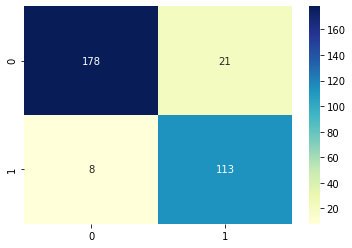

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

# train set 
y_predict_train = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

55 3 1 21


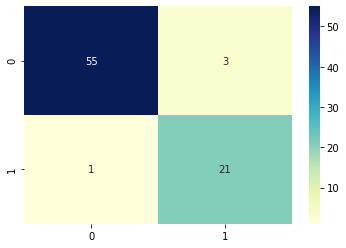

In [20]:
# test set
y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

In [21]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80



#### 실험 결과 케이스
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답).
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답). Type 1 Error.  
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답). Type 2 Error.  
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답). 

#### Classification Metrics
- precision(정밀도): $\dfrac{TP}{TP + FP}$  
  "모델"이 정답이라고 예측한 것 중에서 "실제로" 정답인 비율.
- recall: $\dfrac{TP}{TP + FN}$  
  "실제로" 정답인 것 중에서 "모델"이 정답인 비율.
- f1-score: $\dfrac{2}{\dfrac{1}{precision} + \dfrac{1}{recall}}$  
  precision, recall 조화평균.  
  두 metric의 평균값.큰 비중 점수가 가지는 bias를 줄임.


#### classification_report
- macro average: averaging the unweighted mean per label
- weighted average: averaging the support-weighted mean per label

---

## Exercise

Framingham Heart study dataset

#### Content

Dependent variable
- diabetes: 0 = No; 1 = Yes


Independent variables
- male: 0 = Female; 1 = Male
- age: Age at exam time.
- education: 1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college
- currentSmoker: 0 = nonsmoker; 1 = smoker
- cigsPerDay: number of cigarettes smoked per day (estimated average)
- BPMeds: 0 = Not on Blood Pressure medications; 1 = Is on Blood Pressure medications
- prevalentStroke: prevalentHyp
- totChol: mg/dL
- sysBP: mmHg
- diaBP: mmHg
- BMI: Body Mass Index calculated as: Weight (kg) / Height(meter-squared)
- heartRate: Beats/Min (Ventricular)
- glucose: mg/dL
- TenYearCHD

reference.
https://www.kaggle.com/amanajmera1/framingham-heart-study-dataset

### Step1: Load Dataset

In [22]:
# 'framingham.csv' 파일 읽기 pd.read_csv()
# df shape 확인 

df = pd.read_csv('framingham.csv')
df.shape

(4240, 16)

In [23]:
# df head 행 보기

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [24]:
# df info 보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [25]:
# df descriptive statistics

df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [26]:
# drop null data dropna(how='any', axis=0)

df = df.dropna(how='any', axis=0)
df.shape

(3658, 16)

### Step2: Visualize Dataset

<AxesSubplot:>

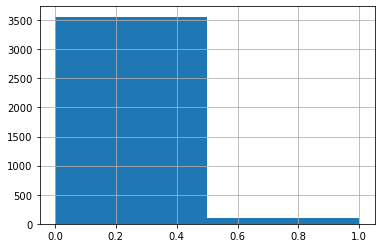

In [27]:
# df[column].histogram
df['diabetes'].hist(bins=2)

In [28]:
# diabetes value_counts

df.diabetes.value_counts()

0    3559
1      99
Name: diabetes, dtype: int64

### Step3: Define Train set and Test Set

In [29]:
# X에 diabetes를 제외한 column까지 할당. axis=1 기준
# y에 diabetes column을 할당


X = df.drop('diabetes', axis=1)
y = df.loc[:, 'diabetes']

In [30]:
# split train set and test set

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test 할당. test_size=0.2, random_state=0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Step4: Train Model

In [31]:
# from sklearn.tree import DecisionTreeClassifier
# classifier에 DecisionTreeClassifier 할당. criterion = 'entropy', max_depth=3


from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [32]:
# minimize ccp (Cost-Complexity Pruning 비용복잡도 가지치기)
# reference. https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
# ccp_alpha: 값이 클수록 모형이 단순해지고(과적합 방지)) 모형 정확도는 감소
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

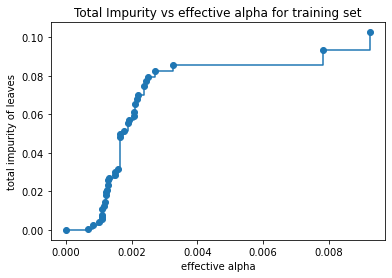

In [33]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [34]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07107865745819787


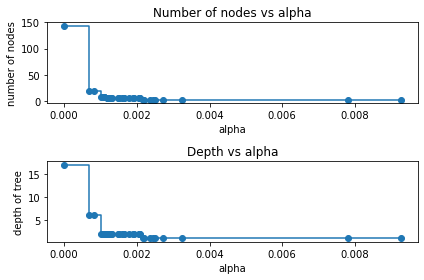

In [35]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

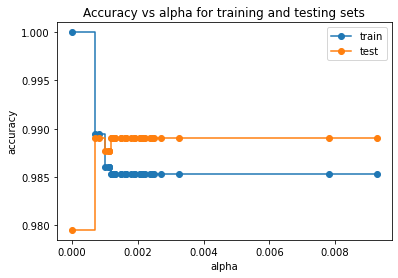

In [36]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [37]:
ccp_alphas

array([0.        , 0.00068353, 0.00082959, 0.00101409, 0.00110906,
       0.00110906, 0.00110906, 0.00110906, 0.00117179, 0.00119831,
       0.00121029, 0.00121605, 0.00124794, 0.0012698 , 0.00128878,
       0.00131476, 0.00149317, 0.00150046, 0.00159848, 0.00165071,
       0.00165224, 0.00177623, 0.00188158, 0.00191338, 0.00206488,
       0.00206488, 0.00209512, 0.00215544, 0.00220582, 0.00236561,
       0.0024341 , 0.00249651, 0.00271171, 0.00324868, 0.00781381,
       0.00926069])

In [38]:
# from sklearn.tree import DecisionTreeClassifier
# classifier에 DecisionTreeClassifier 할당. 
# criterion = 'entropy', random_state = 0, ccp_alpha=0.00068353, max_depth=6
# X_train으로 classifier에 fit

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

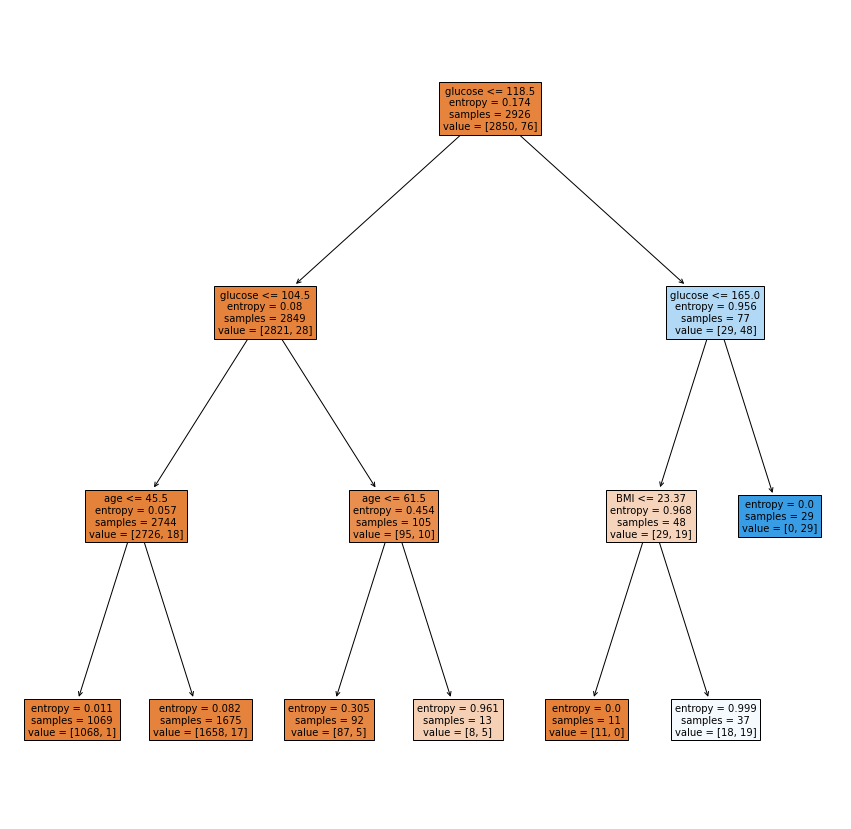

In [39]:
# from sklearn.tree import plot_tree
# use plot_tree. param: feature_name=X_train.columns, filled=True, fontsize

from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(classifier, feature_names=X_train.columns, filled=True, fontsize=10)
plt.show()

In [40]:
# classifier score(mean accuracy on the given test data and labels) on train set.

classifier.score(X_train, y_train)

0.9842788790157211

In [41]:
# classifier score(mean accuracy on the given test data and labels) on test set

classifier.score(X_test, y_test)

0.9863387978142076

### Step5: Predict value

2832 18 28 48


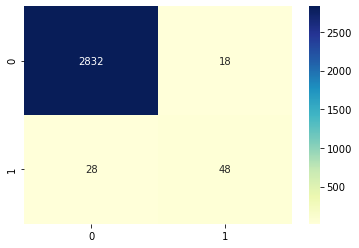

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

# train set 
y_predict_train = classifier.predict(X_train)
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

703 6 4 19


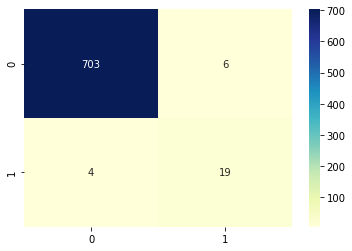

In [43]:
# test set
y_predict_test = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d", cmap='YlGnBu')
tn, fp, fn, tp = cm.ravel()
print(tn, fp, fn, tp)

In [44]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       709
           1       0.76      0.83      0.79        23

    accuracy                           0.99       732
   macro avg       0.88      0.91      0.89       732
weighted avg       0.99      0.99      0.99       732



#### 실험 결과 케이스
- True Positive(TP) : 실제 True인 정답을 True라고 예측 (정답).
- False Positive(FP) : 실제 False인 정답을 True라고 예측 (오답). Type 1 Error.  
- False Negative(FN) : 실제 True인 정답을 False라고 예측 (오답). Type 2 Error.  
- True Negative(TN) : 실제 False인 정답을 False라고 예측 (정답). 

#### Classification Metrics
- precision(정밀도): $\dfrac{TP}{TP + FP}$  
  "모델"이 정답이라고 예측한 것 중에서 "실제로" 정답인 비율.
- recall: $\dfrac{TP}{TP + FN}$  
  "실제로" 정답인 것 중에서 "모델"이 정답인 비율.
- f1-score: $\dfrac{2}{\dfrac{1}{precision} + \dfrac{1}{recall}}$  
  precision, recall 조화평균.  
  두 metric의 평균값.큰 비중 점수가 가지는 bias를 줄임.


#### classification_report
- macro average: averaging the unweighted mean per label
- weighted average: averaging the support-weighted mean per label

# Quiz

다른 방법들을 추가해서 더 높은 f1-score 값을 가진 모형을 생성해 보세요.

해당 모형은 어떤 면에서 기존 모형보다 더 나아졌다고 할 수 있나요?